## О задании
В этом задании вы будете предсказывать один из параметров человека (рост, вес, возраст).

Работать мы будем с датасетом человеческих параметров [Body Fat Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset).

### Формат сдачи
Данное задание сдаётся через [эту гугл форму](https://forms.gle/YdvLRGWAsNaNvQvs7). Не забудьте открыть доступ по ссылке к файлу (справа сверху "Поделиться" или "Share")

## Приступим

Сделаем импорты

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Скачаем данные

In [162]:
!gdown --id 1mgembIyezFrbTlNlRFO5fZu7TcBfT_Uu

/home/alex/sber_hw_bmla/venv/lib/python3.10/site-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mgembIyezFrbTlNlRFO5fZu7TcBfT_Uu
To: /home/alex/sber_hw_bmla/bodyfat.csv
100%|██████████████████████████████████████| 19.6k/19.6k [00:00<00:00, 1.13MB/s]


Загрузите данные из файла `bodyfat.csv` и сохраните в переменную `df`. Выведите первые 5 строк, число строк и столбцов

In [163]:

df = pd.read_csv("bodyfat.csv")
print(f'amount of columns = {len(df.columns)}') #also df.shape[1]
print(f'amount of raws = {df.shape[0]}') #also df.apply() with conditions
print(f'5 1-st lines: \n{df.iloc[:5]}')

amount of columns = 15
amount of raws = 252
5 1-st lines: 
   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


### Первичный анализ

Ознакомиться со значениями признаков вы можете [по ссылке](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset)

Посмотрите, есть ли пропуски в данных. Если есть, то избавьтесь от них. Вам может понадобиться метод [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [164]:
df.dtypes

Density    float64
BodyFat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

In [165]:
df.isnull().sum()

Density    1
BodyFat    1
Age        0
Weight     0
Height     0
Neck       1
Chest      3
Abdomen    2
Hip        1
Thigh      4
Knee       4
Ankle      1
Biceps     2
Forearm    1
Wrist      2
dtype: int64

Получается есть значения NaN в Density, BodyFat, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist

Можно ли заполнить их df.mean() ?

In [166]:
df = df.dropna()

Построим карту корреляций

In [167]:
df.corr().style.background_gradient('gray').format('{:.2g}'.format)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1,-0.99,-0.28,-0.61,0.11,-0.49,-0.69,-0.81,-0.62,-0.57,-0.51,-0.27,-0.51,-0.36,-0.33
BodyFat,-0.99,1,0.29,0.62,-0.097,0.5,0.71,0.82,0.64,0.58,0.52,0.27,0.51,0.37,0.35
Age,-0.28,0.29,1,0.0096,-0.16,0.14,0.19,0.25,-0.023,-0.17,0.05,-0.16,-0.023,-0.061,0.22
Weight,-0.61,0.62,0.0096,1,0.29,0.83,0.9,0.89,0.94,0.87,0.85,0.67,0.8,0.62,0.73
Height,0.11,-0.097,-0.16,0.29,1,0.24,0.12,0.068,0.15,0.12,0.27,0.3,0.19,0.21,0.31
Neck,-0.49,0.5,0.14,0.83,0.24,1,0.78,0.75,0.73,0.69,0.67,0.53,0.73,0.61,0.74
Chest,-0.69,0.71,0.19,0.9,0.12,0.78,1,0.91,0.83,0.74,0.72,0.53,0.73,0.57,0.66
Abdomen,-0.81,0.82,0.25,0.89,0.068,0.75,0.91,1,0.88,0.77,0.74,0.49,0.69,0.49,0.61
Hip,-0.62,0.64,-0.023,0.94,0.15,0.73,0.83,0.88,1,0.89,0.82,0.62,0.73,0.53,0.63
Thigh,-0.57,0.58,-0.17,0.87,0.12,0.69,0.74,0.77,0.89,1,0.79,0.6,0.76,0.55,0.56


**Вопрос.** Глядя на карту корреляций, можете ли вы выявить линейно зависимые признаки?

<u>**Ответ**</u>: Близкие к -1 или 1 являются линейно зависимыми, те:

Density - со всеми кроме Height

BodyFat - Density, Chest, Abdomen

Weight - Neck, Chest, Abdomen, Hip, Thigh, Knee, Biceps, Wrist

Neck - Weight, Chest, Abdomen, Hip, Biceps, Wrist

Abdomen - со всеми кроме Age, Ankle,Biceps, Forearm, Wrist


### Определение целевой и объясняющих переменных

Выберите величину, которую вы собираетесь предсказывать. На выбор: **возраст**, **рост** или **вес**. Укажите это снизу:

### Я предсказываю <u>**Weight**</u>

Отберите признаки, по которым вы будете предсказывать целевую переменную (список из названий столбцов) и запишите их в переменную `cols`.

**Вопрос.** По какому критерию нужно отбирать объясняющие переменные (переменные, по которым предсказываем целевую)

<u>**Ответ**</u>: Чем ближе к 1 зависимость тем лучше

**(*) Дополнительно.** Постройте графики рассеяния между объясняющими переменными и целевой переменной. Наблюдаются ли линейные зависимости?

<u>**Ответ**</u>: Да

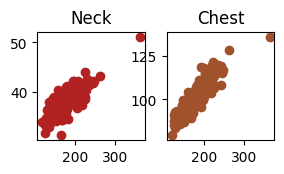

In [168]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 

cols =  ['Neck', 'Chest'] #, 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Biceps', 'Wrist']# список из столбцов - объясняющих переменных
X = df[cols] # отбираем нужные столбцы из исходного датафрейма
plt.subplot(3, 4, 1)
plt.scatter(df['Weight'], X['Neck'], c = 'firebrick')
plt.title('Neck')
plt.subplot(3, 4, 2)
plt.scatter(df['Weight'], X['Chest'], c = 'sienna')
plt.title('Chest')
'''plt.subplot(3, 4, 3)
plt.scatter(df['Weight'], X['Abdomen'], c = 'orange')
plt.title('Abdomen')
plt.subplot(3, 4, 4)
plt.scatter(df['Weight'], X['Hip'], c = 'olivedrab')
plt.title('Hip')
plt.subplot(3, 4, 5)
plt.scatter(df['Weight'], X['Thigh'], c = 'green')
plt.title('Thigh')
plt.subplot(3, 4, 6)
plt.scatter(df['Weight'], X['Knee'], c = 'lime')
plt.title('Knee')
plt.subplot(3, 4, 7)
plt.scatter(df['Weight'], X['Biceps'], c = 'rebeccapurple')
plt.title('Biceps')
plt.subplot(3, 4, 8)
plt.scatter(df['Weight'], X['Wrist'], c = 'fuchsia')
plt.title('Wrist')'''
plt.show()

Запишите в переменную `y` столбец-признак, который предсказываете, а в переменную `X` признаки, по которым предсказываете

In [169]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 

X, y = X, df['Weight']

### Разбиение данных

Разбейте данные на тренировочную и тестовую части. На тестовую выделите 20% выборки, можно зафиксировать `random_state`

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Масштабирование признаков

Отмасштабируйте признаки с помощью [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Не забудьте, что scaler "обучается" только на тренировочных признаках

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


### Построение модели линейной регрессии

Обучите модель [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) на тренировочных данных и сделайте предсказание

In [174]:
from sklearn.linear_model import Ridge

In [175]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯

linreg = Ridge() # здесь будет ваша модель
linreg.fit(X_train, y_train)
y_pred_train = linreg.predict(X_train_scaled) # здесь будут предсказания на тренировочных данных
y_pred_test = linreg.predict(scaler.transform(X_test)) # здесь будут предсказания на тестовых данных

new = [[42.4, 97.3]]
print('predict', linreg.predict(new)) #183.85786192

predict [183.85786192]


/home/alex/sber_hw_bmla/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/home/alex/sber_hw_bmla/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/home/alex/sber_hw_bmla/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


В качестве метрики возьмём **RMSE**. Оцените качество по этой метрике на тренировочной и тестовой выборках. Для вычисления метрики можете воспользоваться функцией **rmse_score**

In [176]:
def rmse_score(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

In [177]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯
rmse_train = rmse_score(y_train, y_pred_train)
rmse_test = rmse_score(y_test, y_pred_test)
print('Качество на тренировочной выборке:', rmse_train)
print('Качество на тестовой выборке:', rmse_test)

Качество на тренировочной выборке: 345.635449395822
Качество на тестовой выборке: 347.6573929330238


**(*) Дополнительно.** Какое качество будет у константной модели по выбранной метрике? Лучше ли предсказания нашей модели?

<u>**Ответ**</u>: _ _ _ _ _ _ _ _ _ _ _ _

### Подбор гиперпараметров

Попробуйте подобрать лучший коэффициент регуляризации с помощью кросс-валидации. Для этого можно воспользоваться готовым классом [`RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

Основные моменты:
* Запишите список значений коэффициента регуляризацию в переменную `alphas`
* Не забудьте указать параметр `scoring` равным "neg_root_mean_squared_error"

In [178]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [179]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯

alphas = [0.1, 1, 10] # можно добавить другие перебираемые значения
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state =1)
ridge_cv = RidgeCV(alphas = alphas, cv = cv, scoring = "neg_root_mean_squared_error") # модель со встроенной кросс-валидацией
ridge_cv.fit(X_train, y_train)

y_pred_train = ridge_cv.predict(X_train_scaled) # здесь будут предсказания на тренировочных данных
y_pred_test = ridge_cv.predict(scaler.transform(X_test)) # здесь будут предсказания на тестовых данных

rmse_train = rmse_score(y_train, y_pred_train)
rmse_test = rmse_score(y_test, y_pred_test)
print('Качество на тренировочной выборке:', rmse_train)
print('Качество на тестовой выборке:', rmse_test)
print('model alpha', ridge_cv.alpha_)
print('param = ', ridge_cv.score(X_train, y_train))


new = [[42.4, 97.3]]
print('predict', ridge_cv.predict(new))

Качество на тренировочной выборке: 344.6046829393311
Качество на тестовой выборке: 346.6280790218272
model alpha 10.0
param =  0.8315749671909738
predict [183.59479723]


/home/alex/sber_hw_bmla/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/home/alex/sber_hw_bmla/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/home/alex/sber_hw_bmla/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


**Вопрос.** Какое получилось лучшее значений гиперпараметра?

In [180]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯

print('Лучшее значение гиперпараметра:', None)

Лучшее значение гиперпараметра: None


Обучите модель `Ridge` с лучшим значением гиперпараметра на тренировочных данных и оцените качество модели

In [181]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯

linreg = Ridge(alpha= 10) # здесь модель с лучшим значением коэффициента регуляризации
linreg.fit(X_train, y_train)

y_pred_train = linreg.predict(X_train_scaled) # здесь будут предсказания на тренировочных данных
y_pred_test = linreg.predict(scaler.transform(X_test)) # здесь будут предсказания на тестовых данных

rmse_train = rmse_score(y_train, y_pred_train)
rmse_test = rmse_score(y_test, y_pred_test)
print('Качество на тренировочной выборке:', rmse_train)
print('Качество на тестовой выборке:', rmse_test)
print('param = ', linreg.score(X_train, y_train))

new = [[42.4, 97.3]]
print('predict', linreg.predict(new))


Качество на тренировочной выборке: 344.6046829393311
Качество на тестовой выборке: 346.6280790218272
param =  0.8315749671909738
predict [183.59479723]


/home/alex/sber_hw_bmla/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/home/alex/sber_hw_bmla/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/home/alex/sber_hw_bmla/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


**Вопрос.** Улучшилось ли качество модели после подбора гиперпараметра?

<u>**Ответ**</u>: _ _ _ _ _ _ _ _ _ _ _ _

**(*) Дополнительно.** Можете поварьировать число сплитов (параметр `cv`). Отразилось ли это на лучшем значении гиперпараметра/качестве модели?

<u>**Ответ**</u>: _ _ _ _ _ _ _ _ _ _ _ _

### Выводы


**Вопрос.** Напишите выводы о проделанной работе: что было сделано, какие результаты получены?

<u>**Ответ**</u>: _ _ _ _ _ _ _ _ _ _ _ _

### (*) Дополнительно

**(*) Дополнительно.** Обучите модель [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), попробуйте также подобрать коэффициенты регуляризации (вам может пригодиться [`LassoCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)) и оценить модель с лучшим гиперпараметром. Сравните получившиеся модели Ridge и Lasso

<u>**Ответ**</u>: _ _ _ _ _ _ _ _ _ _ _ _

**(*) Дополнительно** Для улучшения качества модели может помочь более качественная предобработка данных. Попробуйте:
1. Вместо выбрасывания строк с пустыми значениями попробуйте заполнить их средним (или медианой) по столбцу. Помните, что среднее считается только по тренировочной выборке
2. Попробуйте выявить выбросы в данных. Избавьтесь от них или заполните адекватным значением
3. Попробуйте другой способ масштабирования (например, [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)) или не масштабировать данные
4. Посмотрите на распределение целевой переменной. Попробуйте привести его к нормальному распределению (логарифмирование целевой переменной, возведение в степень,..). При подсчёте метрики придётся применить обратное преобразование целевой переменной

Напишите результаты экспериментов:

<u>**Ответ**</u>: _ _ _ _ _ _ _ _ _ _ _ _